# The Driven Pendulum

<font  face=Times color=darkblue size=3> We use the driven Pendulum as an example to introduce some methods to solve the differential equations.<br> <br>The equation of a driven, damped pendulum is: $x^{''}= -\frac{g}{l}\sin{x}-\gamma x^{'}+Q\sin(t\Omega)$
 <br><br> In special case, that $\gamma=0$,Q = 0, and x is small, this equation reduces to harmonic oscillator with k=mg/l:  $x^{''}=-\frac{k}{m}x$

## Different Methods

<font  face=Times color=darkblue size=3>  We show different methods to approximate the equation of 1D harmonic oscillator, while they are similar in essence.

### Euler Method

<font  face=Times color=darkblue size=3> After discretization: $t=t_n=n*\tau$ 
    <br>So, $$\vec x(n+1)=\vec x(n)+\tau\vec v(n)$$ $$\vec v(n+1)=\vec v(n)+\tau\vec a(n)$$
    $$E(n+1)=\frac{1}{2}kx^2+\frac{1}{2}mv^2=E(n)+\frac{1}{2}\tau^2kv(n)^2+\frac{1}{2}\tau^2\frac{k^2}{m}x(n)^2$$
    <br> For convenience, choose k=m=1, and set x(0)=1, v(0)=0

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set initial conditions
t_Eu=[0]
v_Eu=[0]
x_Eu=[1]
E_Eu=[0.5]
tau=0.01
k=1;m=1

In [3]:
# Use the iteration scheme:
for i in range(1,3000):
    t_Eu.append(tau*i)
    x_Eu.append(x_Eu[i-1]+tau*v_Eu[i-1])
    E_Eu.append(E_Eu[i-1]+0.5*np.power(tau,2)*np.power(v_Eu[i-1],2)+0.5*np.power(tau,2)*np.power(x_Eu[i-1],2))
    v_Eu.append(v_Eu[i-1]+tau*(-k/m)*x_Eu[i-1])

### Velocity Verlet Method

<font  face=Times color=darkblue size=3> Use the centered 3-point formula, we get:$$\vec x(n+1)=2\vec x(n)-\vec x(n-1)+\tau^2\vec a(n)$$
    $$\vec v(n)=\frac{\vec x(n+1)-\vec x(n-1)}{2\tau},   \quad \vec{x}(-1)=\vec{x}(0)-\tau\vec v(0)+\frac{\tau^2}{2}\vec a(0)$$
    <br> which is Verlet Method.
    <br> Then, we can simply derive the Velocity Verlet Method from it :
    $$\vec x(n+1)=\vec x(n)+\tau\vec v(n)+\frac{1}{2}\tau^2\vec a(n)$$
    $$\vec v(n+1)=\vec v(n)+\frac{1}{2}\tau(\vec a(n)+\vec a(n+1))$$
    <br>which is self-starting and we are gonna show the code of.

In [4]:
#initial condition
t_vv=[0]
v_vv=[0]
x_vv=[1]
E_vv=[0.5]

In [5]:
for i in range(1,3000):
    t_vv.append(tau*i)
    x_vv.append(x_vv[i-1]+tau*v_vv[i-1]+0.5*np.power(tau,2)*(-k/m)*x_vv[i-1])
    v_vv.append(v_vv[i-1]+0.5*tau*(-k/m)*(x_vv[i-1]+x_vv[i]))
    E_vv.append(0.5*k*np.power(x_vv[i],2)+0.5*m*np.power(v_vv[i],2))

### Runge-Kutta Methods

<font  face=Times color=darkblue size=3>
    A general procedure to obtain higher order Runge-Kutta method is:
 $$x(t+\tau)=x(t)+\sum_{i=1}^{p}w_ik_i$$ <br> with $k_1=\tau f(x(t),t), \qquad k_i=\tau f\lgroup x(t)+\sum_{j<i}\alpha_{ij}k_j,t+\sum_{j<i}\alpha_{ij}\tau\rgroup,i\ge2$
<br><br>The most popular one is 4-th order Runge-Kutta method:
    \begin{equation}
    \begin{aligned}
    \\& k_1=\tau v(n)
    \\& l_1=\tau a(n)
    \\& k_2=\tau(v(n)+\frac{1}{2}l_1)
    \\& l_2=\tau a(x(n)+\frac{1}{2}k_1,v(n)+\frac{1}{2}l_1,t+\frac{1}{2}\tau)
    \\& k_3=\tau (v(n)+\frac{1}{2}l_2)
    \\& l_3=\tau a(x(n)+\frac{1}{2}k_2,v(n)+\frac{1}{2}l_2,t+\frac{1}{2}\tau)
    \\& k_4=\tau (v(n)+l_3)
    \\& l_4=\tau a(x(n)+k_3,v(n)+l_3,t+\tau)
    \end{aligned}
    \end{equation}
    $$x(n+1)=x(n)+\frac{1}{6}(k_1+2k_2+2k_3+k_4)$$
    $$v(n+1)=v(n)+\frac{1}{6}(l_1+2l_2+2l_3+l_4)$$

In [6]:
#initial condition
t_rk=[0]
v_rk=[0]
x_rk=[1]
E_rk=[0.5]

In [7]:
for i in range(1,3000):
    t_rk.append(tau*i)
    k1=tau*v_rk[i-1]
    l1=tau*(-k/m)*x_rk[i-1]
    k2=tau*(v_rk[i-1]+0.5*l1)
    l2=tau*(-k/m)*(x_rk[i-1]+0.5*k1)
    k3=tau*(v_rk[i-1]+0.5*l2)
    l3=tau*(-k/m)*(x_rk[i-1]+0.5*k2)
    k4=tau*(v_rk[i-1]+l3)
    l4=tau*(-k/m)*(x_rk[i-1]+k3)
    x_rk.append(x_rk[i-1]+(1/6)*(k1+2*k2+2*k3+k4))
    v_rk.append(v_rk[i-1]+(1/6)*(l1+2*l2+2*l3+l4))
    E_rk.append(0.5*k*np.power(x_rk[i],2)+0.5*m*np.power(v_rk[i],2))

### Comparison of The Methods

(-1.5, 2.0)

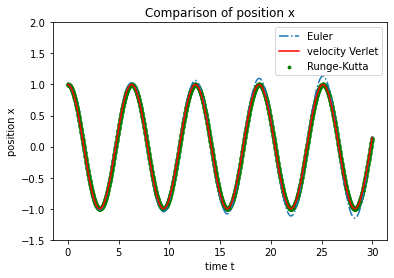

In [8]:
#postion x plot
plt.plot(t_Eu,x_Eu,'-.',label='Euler')
plt.plot(t_vv,x_vv,color='red',label='velocity Verlet')
plt.scatter(t_rk,x_rk,color='green',s=8,label='Runge-Kutta')
plt.legend()
plt.xlabel('time t')
plt.ylabel('position x')
plt.title('Comparison of position x')
plt.ylim(-1.5,2)

(0.499985, 0.500005)

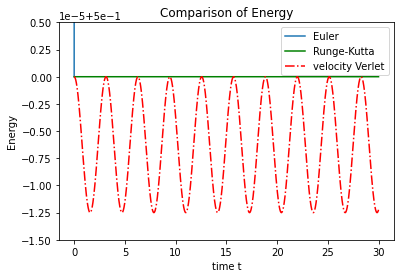

In [9]:
#energy plot
plt.plot(t_Eu,E_Eu,label='Euler')
plt.plot(t_rk,E_rk,color='green',label='Runge-Kutta')
plt.plot(t_vv,E_vv,'-.',color='red',label='velocity Verlet')
plt.legend()
plt.xlabel('time t')
plt.ylabel('Energy')
plt.title('Comparison of Energy')
plt.ylim(0.499985,0.500005)

<font  face=Times color=darkblue size=3> We can see the Runge-Kutta method for a periodic motion does note have a bounded error in contrast to Verlet methods, while Euler Method seems to be the worst.

## Motion of The Damped, Driven Pendulum

<font  face=Times color=darkblue size=3> Now, we use Runge-Kutta method to study the driven pendulum, $$x^{''}= -k\sin{x}-\gamma x^{'}+Q\sin(t\Omega)$$ 
    <br> we set Q=1 and $\gamma$=0.1

In [10]:
#initial condition
t_pen=[0]
v_pen=[0]
x_pen=[1]
gamma=0.1
Q=1
omega=2

In [11]:
for i in range(1,10000):
    t_pen.append(tau*i)
    k1=tau*v_pen[i-1]
    l1=tau*(-k*np.sin(x_pen[i-1])-gamma*v_pen[i-1]+Q*np.sin(tau*i*omega))
    k2=tau*(v_pen[i-1]+0.5*l1)
    l2=tau*(-k*np.sin(x_pen[i-1]+0.5*k1)-gamma*(v_pen[i-1]+0.5*l1)+Q*np.sin(tau*(i+0.5)*omega))
    k3=tau*(v_pen[i-1]+0.5*l2)
    l3=tau*(-k*np.sin(x_pen[i-1]+0.5*k2)-gamma*(v_pen[i-1]+0.5*l2)+Q*np.sin(tau*(i+0.5)*omega))
    k4=tau*(v_pen[i-1]+l3)
    l4=tau*(-k*np.sin(x_pen[i-1]+k3)-gamma*(v_pen[i-1]+l3)+Q*np.sin(tau*(i+1)*omega))
    x_pen.append(x_pen[i-1]+(1/6)*(k1+2*k2+2*k3+k4))
    v_pen.append(v_pen[i-1]+(1/6)*(l1+2*l2+2*l3+l4))

Text(0, 0.5, 'x')

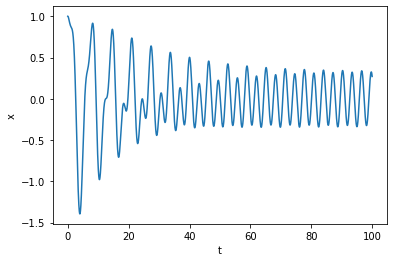

In [12]:
# plot the position x of the pendulum
plt.plot(t_pen,x_pen)
plt.xlabel('t')
plt.ylabel('x')

<font  face=Times color=darkblue size=3> We see that the pendulum after an initial damped, irregular motion takes on a periodic oscillation.
    <br><br>In phase space, as plotted below, the trajectory is seen to be eventually driven towards a cyclic attractor.

Text(0, 0.5, 'dx/dt')

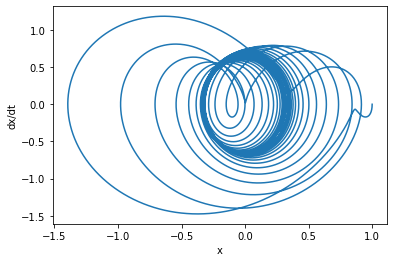

In [13]:
plt.plot(x_pen,v_pen)
plt.xlabel('x')
plt.ylabel('dx/dt')